<a href="https://colab.research.google.com/github/Omarrhussain/SYNC-S-Internship/blob/main/Boston_House_Price_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries 📚

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_train = pd.read_csv('/content/boston_train.csv')
df_train

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [ ]:
df_train.head().style.hide_index()

ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.006320,18.000000,2.310000,0,0.538000,6.575000,65.200000,4.090000,1,296,15.300000,396.900000,4.980000,24.000000
2,0.027310,0.000000,7.070000,0,0.469000,6.421000,78.900000,4.967100,2,242,17.800000,396.900000,9.140000,21.600000
4,0.032370,0.000000,2.180000,0,0.458000,6.998000,45.800000,6.062200,3,222,18.700000,394.630000,2.940000,33.400000
5,0.069050,0.000000,2.180000,0,0.458000,7.147000,54.200000,6.062200,3,222,18.700000,396.900000,5.330000,36.200000
7,0.088290,12.500000,7.870000,0,0.524000,6.012000,66.600000,5.560500,5,311,15.200000,395.600000,12.430000,22.900000


In [ ]:
#df_train.head(10)
df_train.head(10).style.background_gradient(cmap='Reds')

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.006320,18.000000,2.310000,0,0.538000,6.575000,65.200000,4.090000,1,296,15.300000,396.900000,4.980000,24.000000
1,2,0.027310,0.000000,7.070000,0,0.469000,6.421000,78.900000,4.967100,2,242,17.800000,396.900000,9.140000,21.600000
2,4,0.032370,0.000000,2.180000,0,0.458000,6.998000,45.800000,6.062200,3,222,18.700000,394.630000,2.940000,33.400000
3,5,0.069050,0.000000,2.180000,0,0.458000,7.147000,54.200000,6.062200,3,222,18.700000,396.900000,5.330000,36.200000
4,7,0.088290,12.500000,7.870000,0,0.524000,6.012000,66.600000,5.560500,5,311,15.200000,395.600000,12.430000,22.900000
5,11,0.224890,12.500000,7.870000,0,0.524000,6.377000,94.300000,6.346700,5,311,15.200000,392.520000,20.450000,15.000000
6,12,0.117470,12.500000,7.870000,0,0.524000,6.009000,82.900000,6.226700,5,311,15.200000,396.900000,13.270000,18.900000
7,13,0.093780,12.500000,7.870000,0,0.524000,5.889000,39.000000,5.450900,5,311,15.200000,390.500000,15.710000,21.700000
8,14,0.629760,0.000000,8.140000,0,0.538000,5.949000,61.800000,4.707500,4,307,21.000000,396.900000,8.260000,20.400000
9,15,0.637960,0.000000,8.140000,0,0.538000,6.096000,84.500000,4.461900,4,307,21.000000,380.020000,10.260000,18.200000


In [ ]:
#df_train.tail(10)
df_train.tail(10).style.background_gradient(cmap = 'Blues')

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
323,491,0.207460,0.000000,27.740000,0,0.609000,5.093000,98.000000,1.822600,4,711,20.100000,318.430000,29.680000,8.100000
324,492,0.105740,0.000000,27.740000,0,0.609000,5.983000,98.800000,1.868100,4,711,20.100000,390.110000,18.070000,13.600000
325,493,0.111320,0.000000,27.740000,0,0.609000,5.983000,83.500000,2.109900,4,711,20.100000,396.900000,13.350000,20.100000
326,494,0.173310,0.000000,9.690000,0,0.585000,5.707000,54.000000,2.381700,6,391,19.200000,396.900000,12.010000,21.800000
327,498,0.268380,0.000000,9.690000,0,0.585000,5.794000,70.600000,2.892700,6,391,19.200000,396.900000,14.100000,18.300000
328,500,0.177830,0.000000,9.690000,0,0.585000,5.569000,73.500000,2.399900,6,391,19.200000,395.770000,15.100000,17.500000
329,502,0.062630,0.000000,11.930000,0,0.573000,6.593000,69.100000,2.478600,1,273,21.000000,391.990000,9.670000,22.400000
330,503,0.045270,0.000000,11.930000,0,0.573000,6.120000,76.700000,2.287500,1,273,21.000000,396.900000,9.080000,20.600000
331,504,0.060760,0.000000,11.930000,0,0.573000,6.976000,91.000000,2.167500,1,273,21.000000,396.900000,5.640000,23.900000
332,506,0.047410,0.000000,11.930000,0,0.573000,6.030000,80.800000,2.505000,1,273,21.000000,396.900000,7.880000,11.900000


In [ ]:
#df_train.sample(10)
df_train.sample(10).style.background_gradient()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
142,205,0.020090,95.000000,2.680000,0,0.416100,8.034000,31.900000,5.118000,4,224,14.700000,390.550000,2.880000,50.000000
137,195,0.014390,60.000000,2.930000,0,0.401000,6.604000,18.800000,6.219600,1,265,15.600000,376.700000,4.380000,29.100000
272,420,11.812300,0.000000,18.100000,0,0.718000,6.824000,76.500000,1.794000,24,666,20.200000,48.450000,22.740000,8.400000
1,2,0.027310,0.000000,7.070000,0,0.469000,6.421000,78.900000,4.967100,2,242,17.800000,396.900000,9.140000,21.600000
321,488,4.835670,0.000000,18.100000,0,0.583000,5.905000,53.200000,3.152300,24,666,20.200000,388.220000,11.450000,20.600000
168,247,0.339830,22.000000,5.860000,0,0.431000,6.108000,34.900000,8.055500,7,330,19.100000,390.180000,9.160000,24.300000
184,274,0.221880,20.000000,6.960000,1,0.464000,7.691000,51.800000,4.366500,3,223,18.600000,390.770000,6.580000,35.200000
213,319,0.402020,0.000000,9.900000,0,0.544000,6.382000,67.200000,3.532500,4,304,18.400000,395.210000,10.360000,23.100000
325,493,0.111320,0.000000,27.740000,0,0.609000,5.983000,83.500000,2.109900,4,711,20.100000,396.900000,13.350000,20.100000
294,454,8.248090,0.000000,18.100000,0,0.713000,7.393000,99.300000,2.452700,24,666,20.200000,375.870000,16.740000,17.800000


In [ ]:
df_train.shape

(333, 15)

In [ ]:
df_train.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [ ]:
df_train.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [ ]:
df_train.isna().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

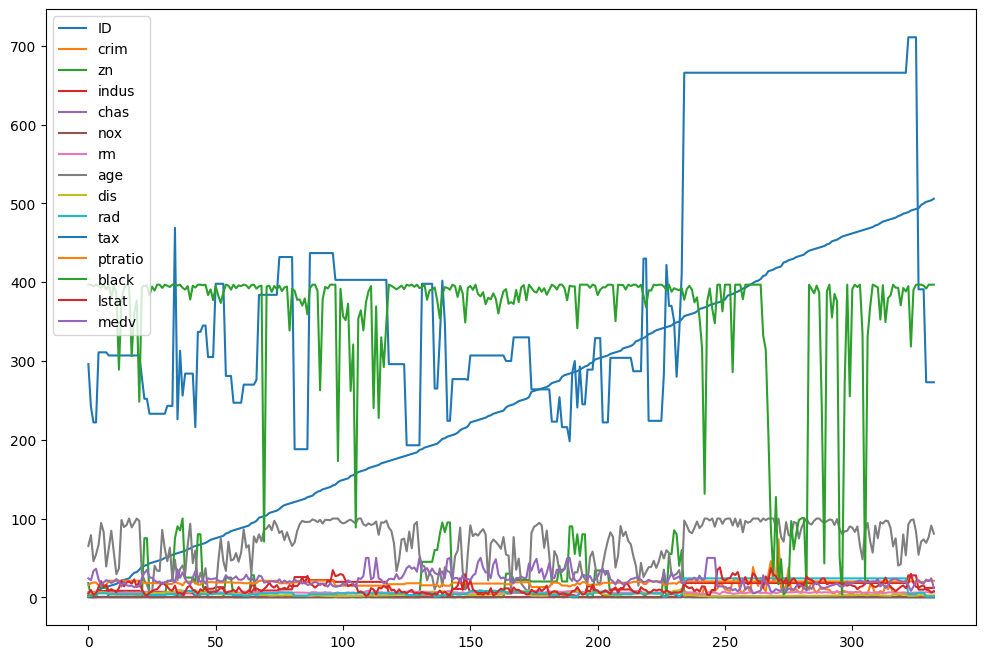

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]#resize the plot
#plt.figure(figsize = (12, 8))

df_train.plot()
plt.show()

In [ ]:
#df_train.describe()
#df_train.describe().T
df_train.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
ID,333.000000,250.951952,147.859438,1.000000,123.000000,244.000000,377.000000,506.000000
crim,333.000000,3.360341,7.352272,0.006320,0.078960,0.261690,3.678220,73.534100
zn,333.000000,10.689189,22.674762,0.000000,0.000000,0.000000,12.500000,100.000000
indus,333.000000,11.293483,6.998123,0.740000,5.130000,9.900000,18.100000,27.740000
chas,333.000000,0.060060,0.237956,0.000000,0.000000,0.000000,0.000000,1.000000
nox,333.000000,0.557144,0.114955,0.385000,0.453000,0.538000,0.631000,0.871000
rm,333.000000,6.265619,0.703952,3.561000,5.884000,6.202000,6.595000,8.725000
age,333.000000,68.226426,28.133344,6.000000,45.400000,76.700000,93.800000,100.000000
dis,333.000000,3.709934,1.981123,1.129600,2.122400,3.092300,5.116700,10.710300
rad,333.000000,9.633634,8.742174,1.000000,4.000000,5.000000,24.000000,24.000000


In [ ]:
df_train.mean()

ID         250.951952
crim         3.360341
zn          10.689189
indus       11.293483
chas         0.060060
nox          0.557144
rm           6.265619
age         68.226426
dis          3.709934
rad          9.633634
tax        409.279279
ptratio     18.448048
black      359.466096
lstat       12.515435
medv        22.768769
dtype: float64

In [ ]:
#ID columns does not relevant for our analysis.
df_train.drop('ID', axis = 1, inplace=True)

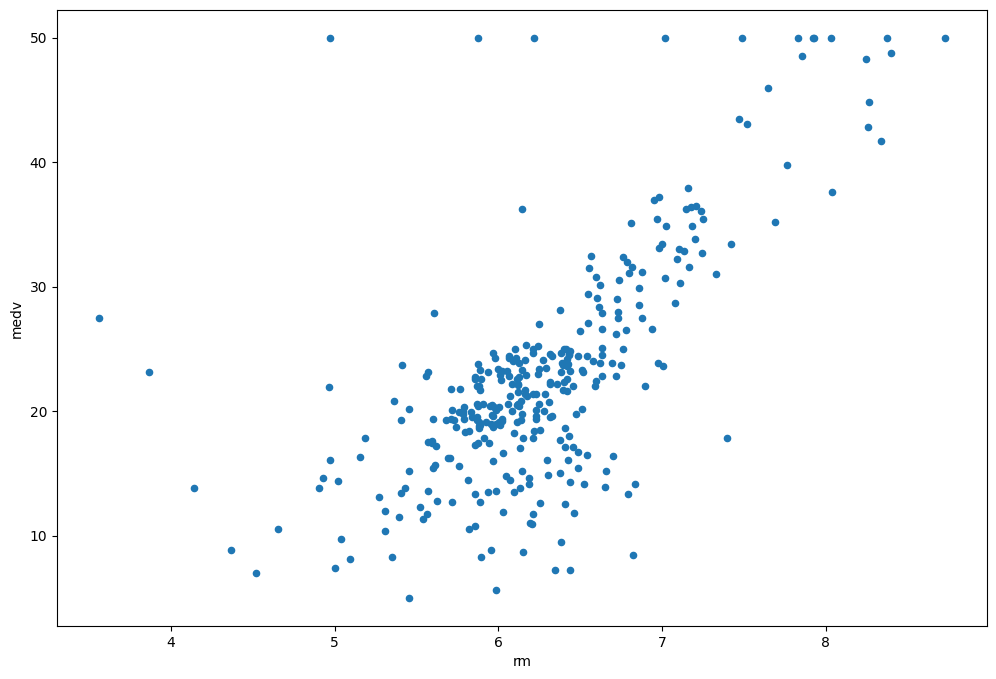

In [ ]:
df_train.plot.scatter('rm', 'medv');

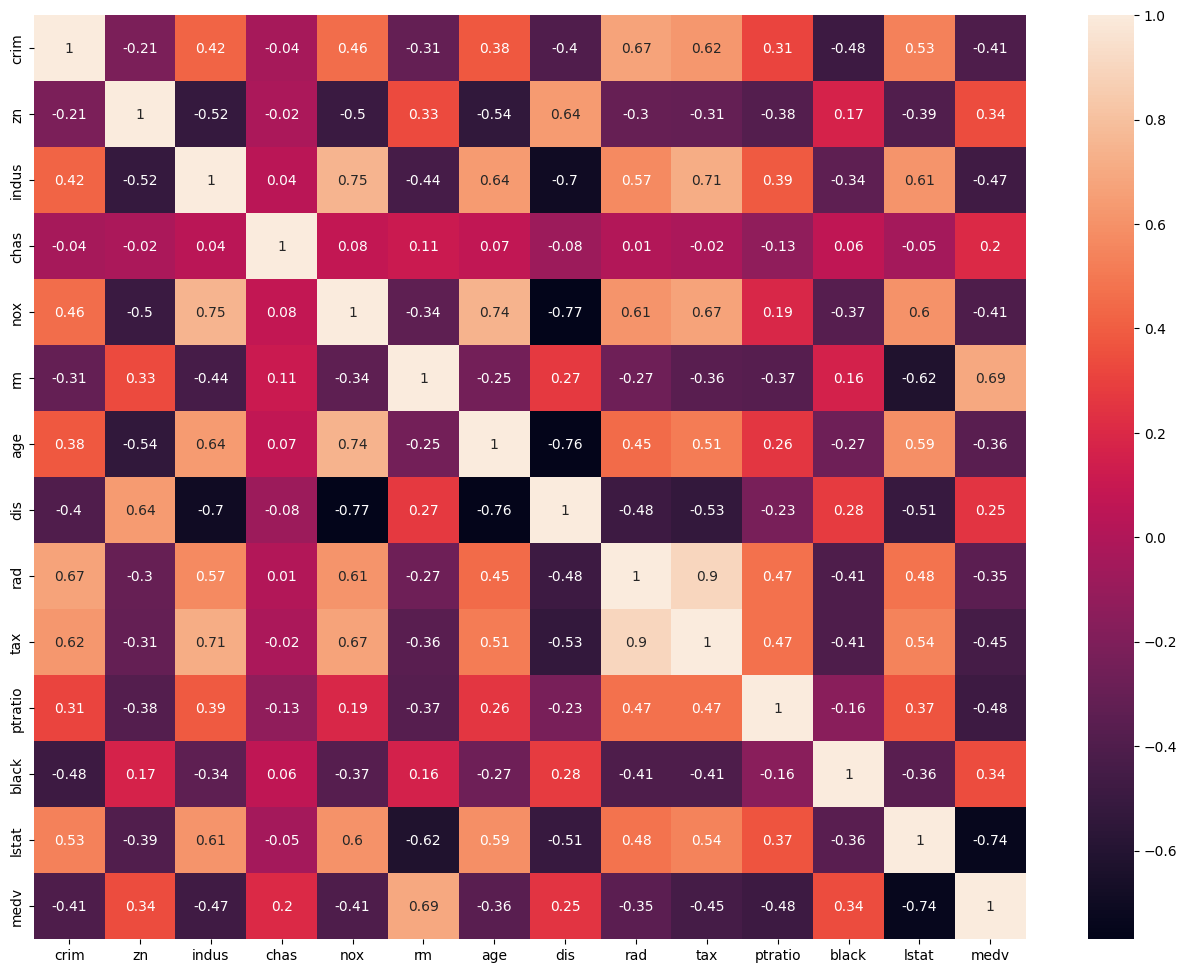

In [ ]:
# Correlation
plt.subplots(figsize=(16,12))
correlation = df_train.corr().round(2)
sns_plot=sns.heatmap(correlation, annot=True)

#plt.figure(figsize= (18,15))
#sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='Greens')

In [ ]:
# correlation values of Gold
print(correlation['medv'])

crim      -0.41
zn         0.34
indus     -0.47
chas       0.20
nox       -0.41
rm         0.69
age       -0.36
dis        0.25
rad       -0.35
tax       -0.45
ptratio   -0.48
black      0.34
lstat     -0.74
medv       1.00
Name: medv, dtype: float64


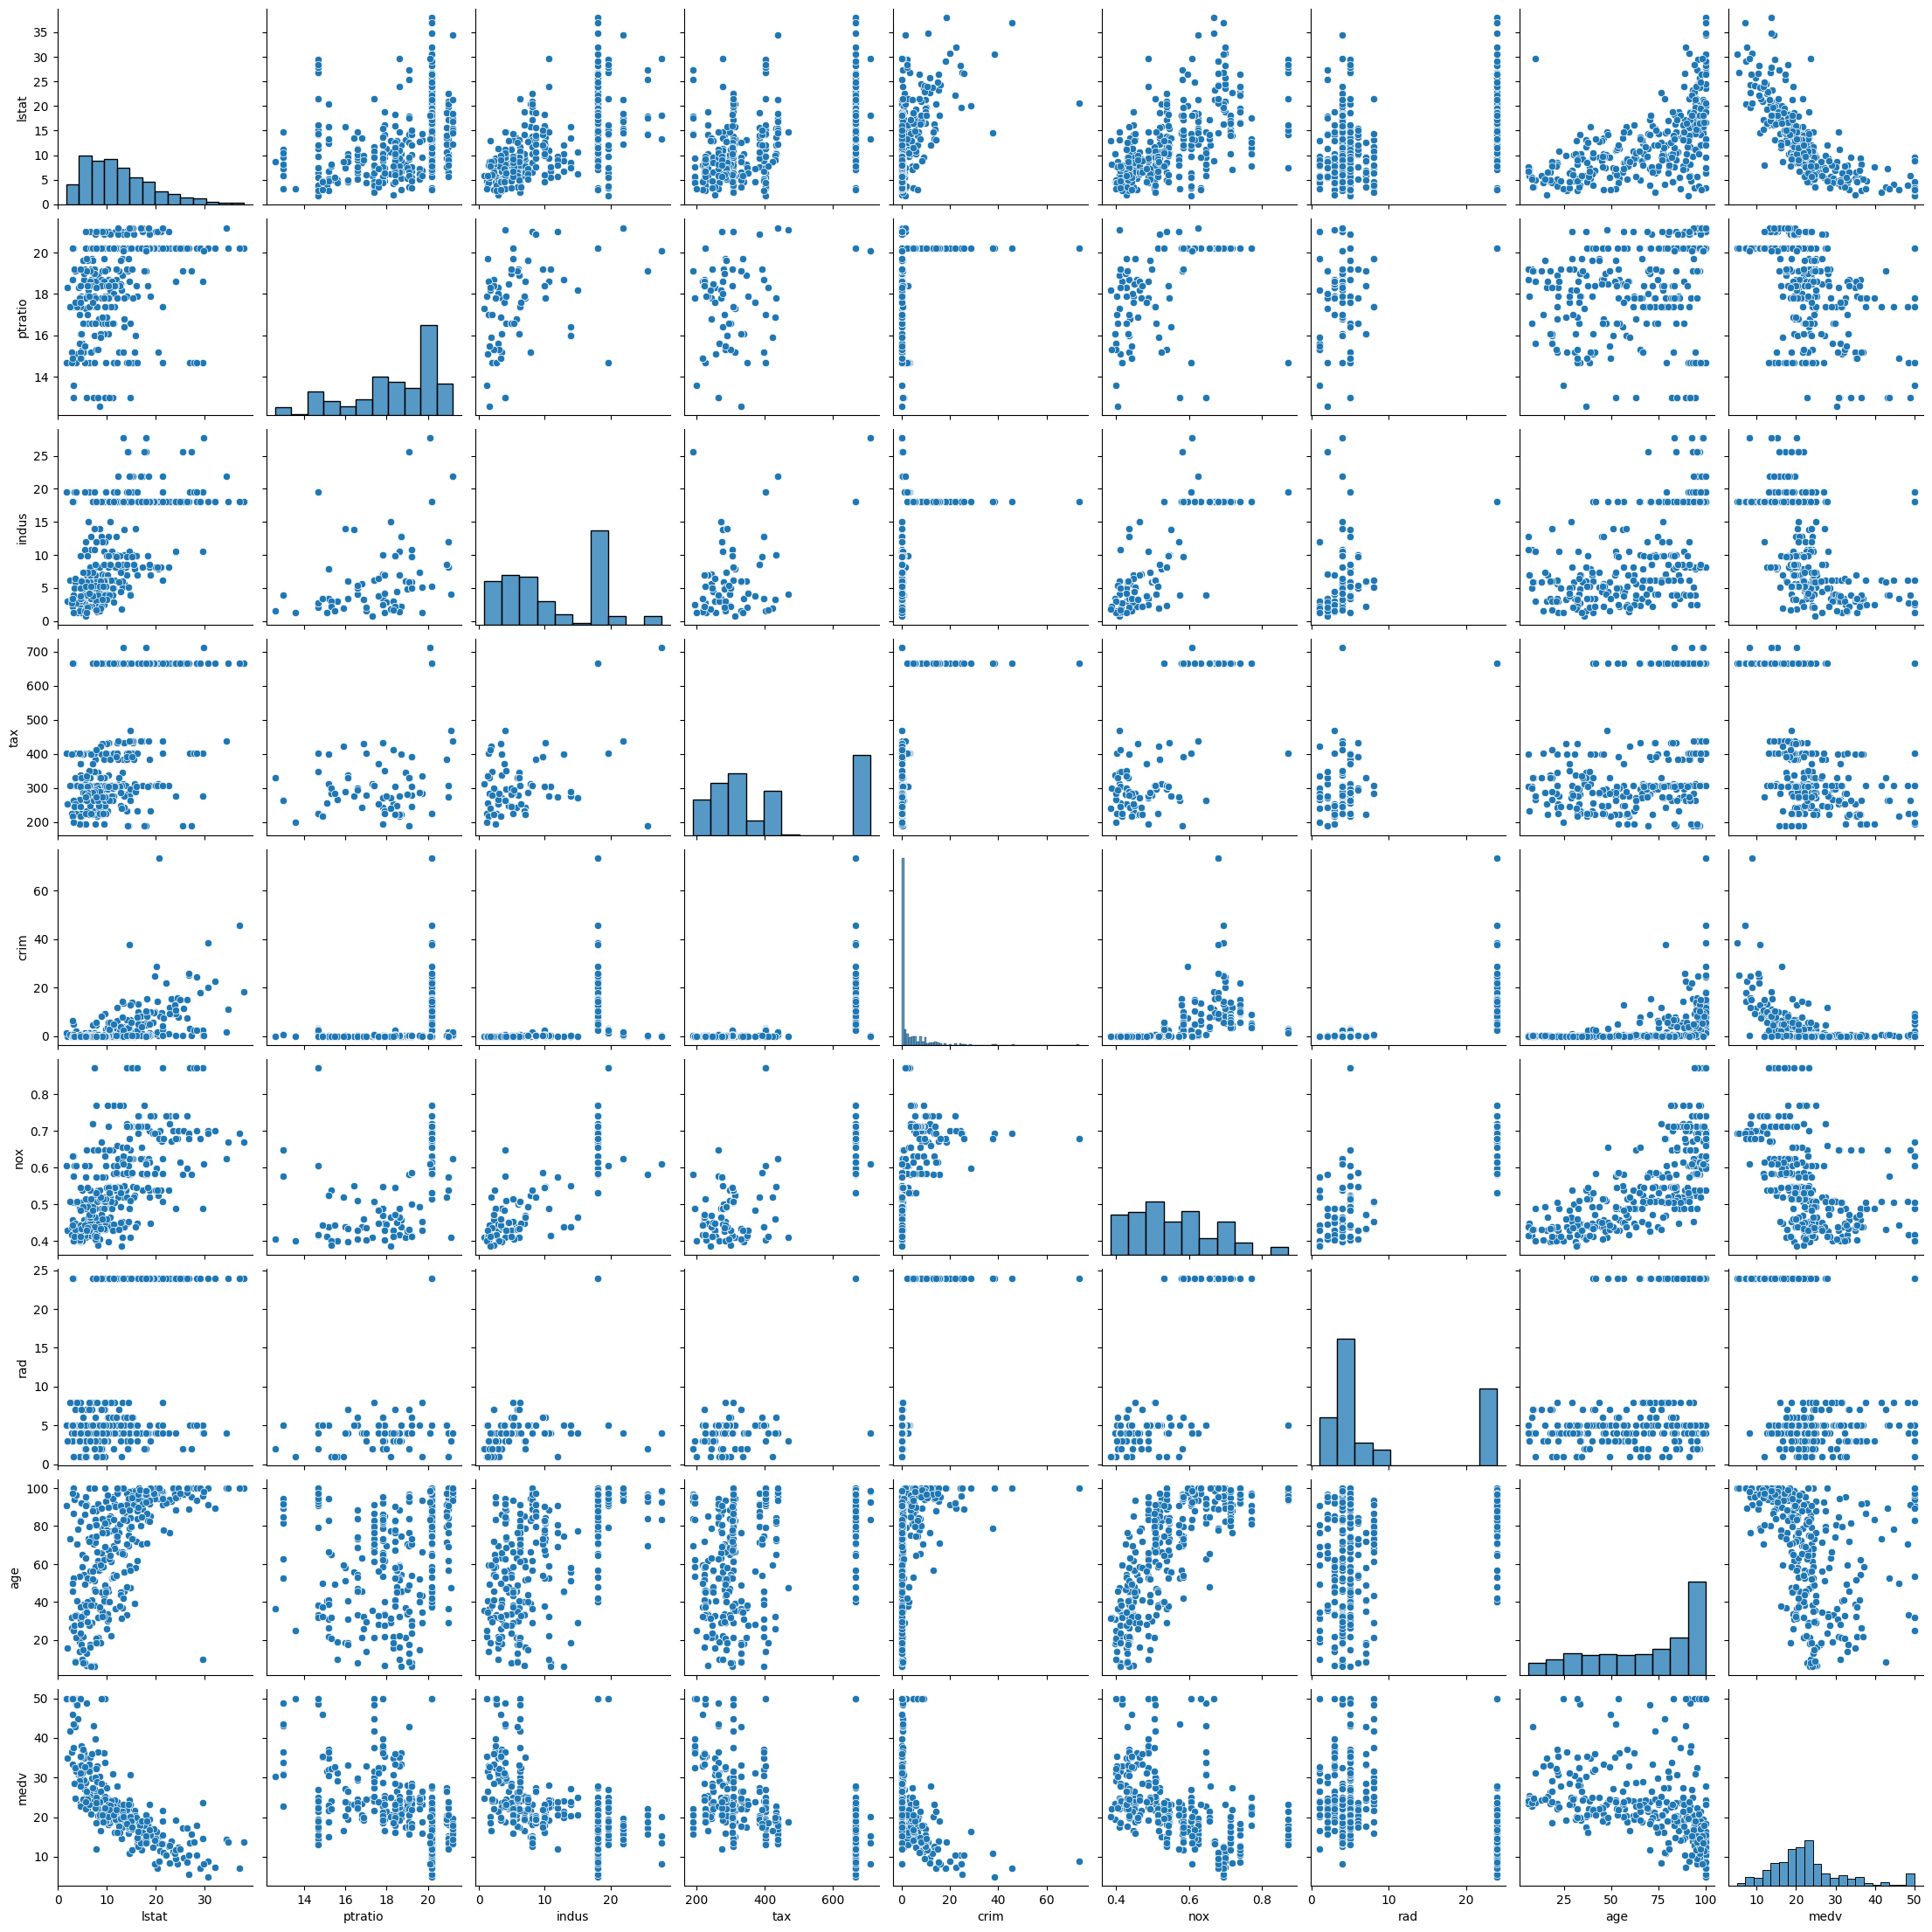

In [ ]:
sns.pairplot(df_train, vars = ['lstat', 'ptratio', 'indus', 'tax', 'crim', 'nox', 'rad', 'age', 'medv'])

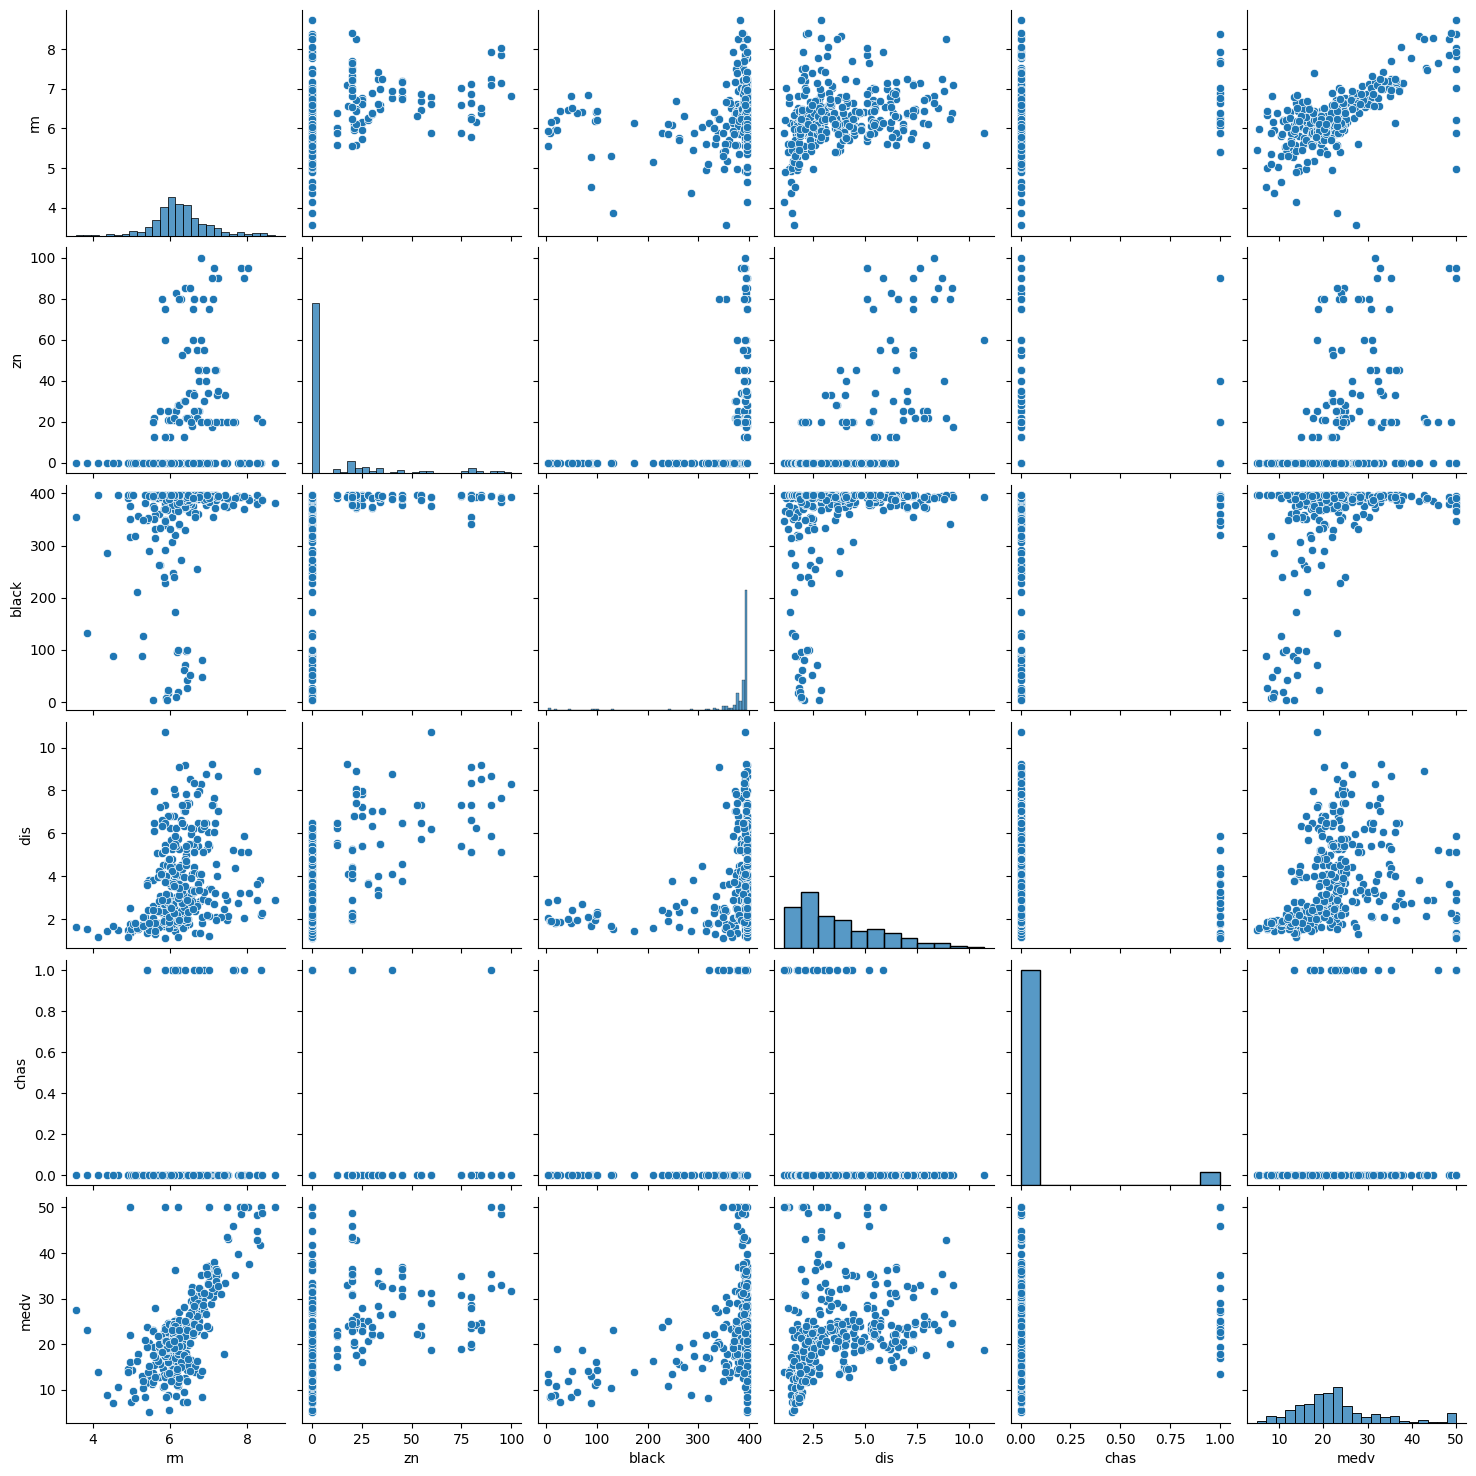

In [ ]:
sns.pairplot(df_train, vars = ['rm', 'zn', 'black', 'dis', 'chas','medv'])

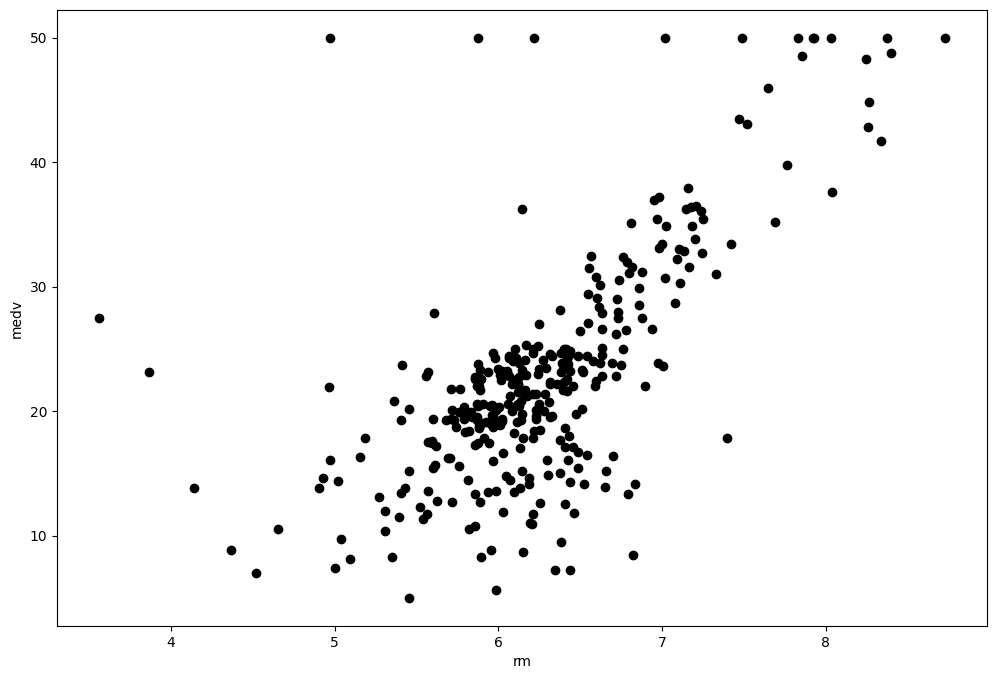

In [ ]:
plt.scatter(df_train.rm , df_train.medv, color="black")
#df_train.plot.scatter('rm', 'medv')
plt.xlabel("rm")
plt.ylabel("medv")
plt.show()

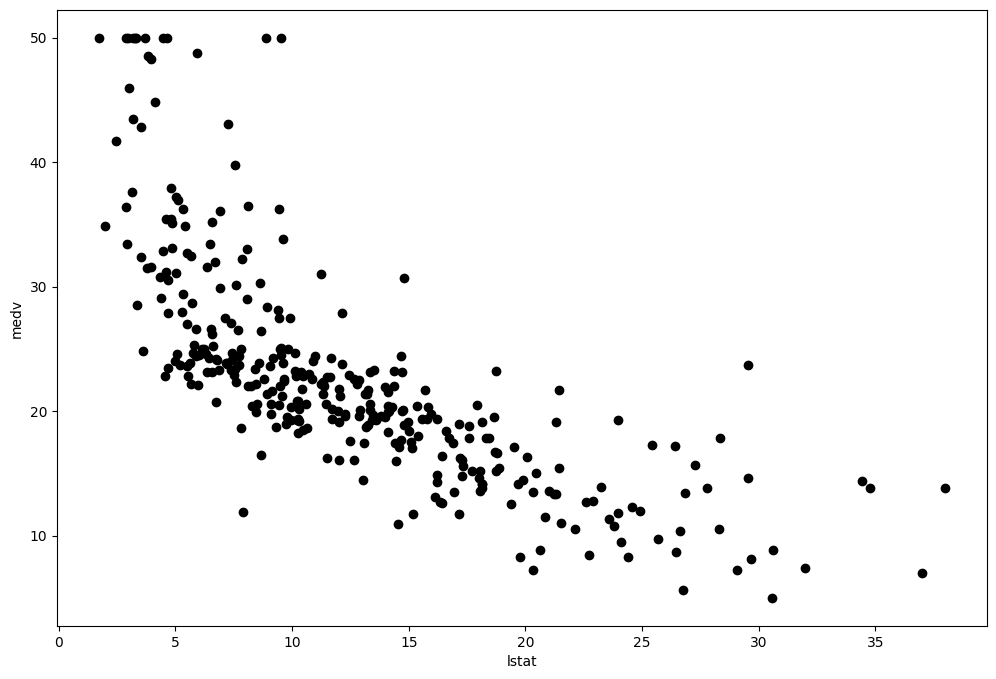

In [ ]:
plt.scatter(df_train.lstat, df_train.medv, color="black")
#df_train.plot.scatter('lstat' ,'medv')
plt.xlabel("lstat")
plt.ylabel("medv")
plt.show()

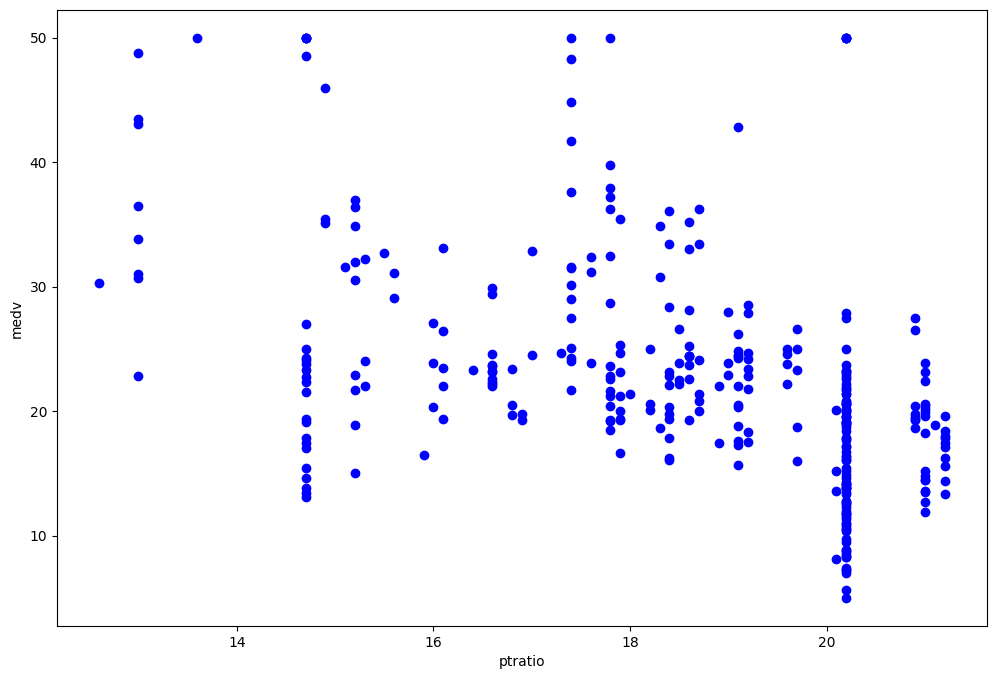

In [ ]:
plt.scatter(df_train.ptratio,df_train.medv, color="Blue")
#df_train.plot.scatter('ptratio', 'medv')
plt.xlabel("ptratio")
plt.ylabel("medv")
plt.show()

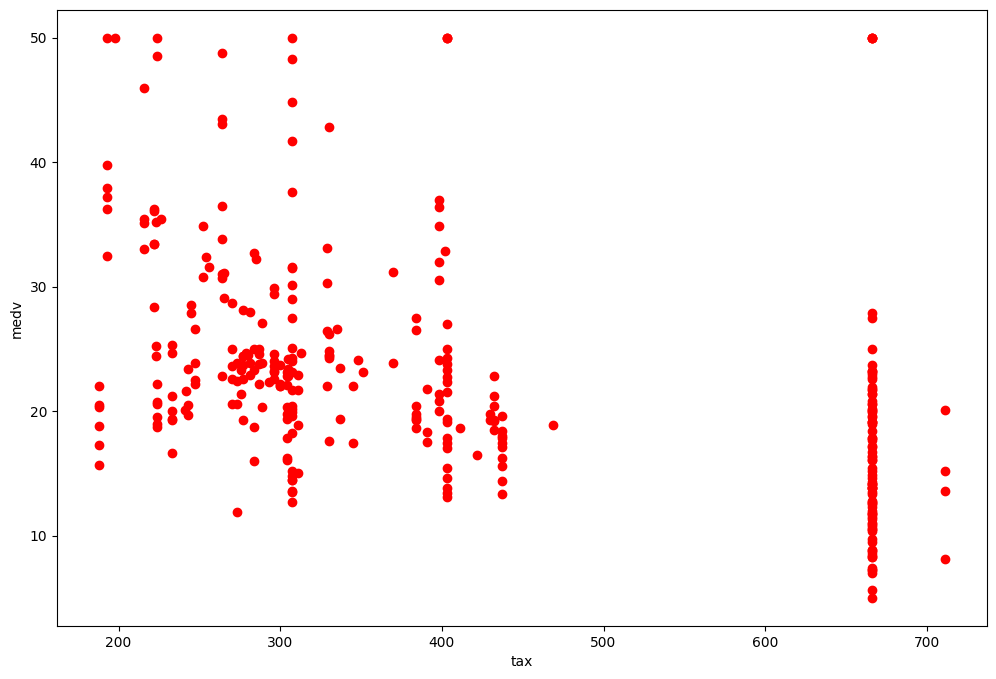

In [ ]:
plt.scatter(df_train.tax, df_train.medv, color="Red")
#df_train.plot.scatter('tax', 'medv')
plt.xlabel("tax")
plt.ylabel("medv")
plt.show()

In [ ]:
X = df_train[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]
y = df_train['medv']

In [ ]:
# Split arrays or matrices into random train and test subsets
#random_state #Testing the model with 20% of the dataset & training it with 80% of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=0)

In [ ]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
print("Accuracy --> ", LR.score(X_test, y_test)*100)

Accuracy -->  73.12411054098573


In [ ]:
predictions = LR.predict(X_test)

In [ ]:
# R Squared error
error_score = metrics.r2_score(y_test, predictions) # coefficient of determination, regression score function.
print('R squared error : ', error_score *100)

R squared error :  73.12411054098573


In [ ]:
regressor = RandomForestRegressor(n_estimators=100)
regressor

RandomForestRegressor()

In [ ]:
# training the model
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
print("Accuracy --> ", regressor.score(X_test, y_test)*100)

Accuracy -->  90.38797455893423


In [ ]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
# R Squared error
error_score = metrics.r2_score(y_test, test_data_prediction) # coefficient of determination, regression score function.
print('R squared error : ', error_score *100)

R squared error :  90.38797455893423


In [ ]:
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)
gbr = regressor.fit(X_train,y_train)

In [ ]:
print("Accuracy --> ",gbr.score(X_test, y_test)*100)

Accuracy -->  90.56739849617622


In [ ]:
# prediction on Test Data
test_data_prediction1 = gbr.predict(X_test)

In [ ]:
# R Squared error
error_score = metrics.r2_score(y_test, test_data_prediction1 ) # coefficient of determination, regression score function.
print('R squared error : ', error_score *100)

R squared error :  90.56739849617622
